# Test `pt_atkinson_tide` Module

Render figure object produced by the `nowcast.figures.publish.pt_atkinson_tide` module.
Provides data for visual testing to confirm that refactoring has not adversely changed figure for web page.

Set-up and function call replicates as nearly as possible what is done in the `nowcast.workers.make_plots` worker.

Notebooks like this should be developed in a
[Nowcast Figures Development Environment](https://salishsea-nowcast.readthedocs.io/en/latest/figures/fig_dev_env.html)
so that all of the necessary dependency packages are installed.
The development has to be done on a workstation that has the Salish Sea Nowcast system `/results/` parition mounted.

In [1]:
import io
from pathlib import Path

import arrow
import netCDF4 as nc
import yaml

from salishsea_tools import nc_tools

from nowcast.figures import figures
from nowcast.figures.publish import pt_atkinson_tide

In [2]:
%matplotlib inline

In [3]:
config = '''
    timezone: Canada/Pacific
    
    ssh:
        tidal_predictions: /results/nowcast-sys/tools/SalishSeaNowcast/tidal_predictions/

    run:
        results_archive:
            nowcast: /results/SalishSea/nowcast/
            forecast: /results/SalishSea/forecast/
'''

config = yaml.load(io.StringIO(config))

In [4]:
run_date = arrow.get('2016-06-01')
run_type = 'nowcast'

dmy = run_date.format('DDMMMYY').lower()
start_day = {
    'nowcast': run_date.format('YYYYMMDD'),
    'forecast': run_date.replace(days=+1).format('YYYYMMDD'),
}
end_day = {
    'nowcast': run_date.format('YYYYMMDD'),
    'forecast': run_date.replace(days=+2).format('YYYYMMDD'),
}

results_home = Path(config['run']['results_archive'][run_type])
results_dir = results_home/dmy

In [5]:
grid_T_hr = nc.Dataset(
    str(results_dir/'SalishSea_1h_{0}_{1}_grid_T.nc'
        .format(start_day[run_type], end_day[run_type])))
tidal_predictions = config['ssh']['tidal_predictions']

1 loop, best of 1: 8.66 s per loop


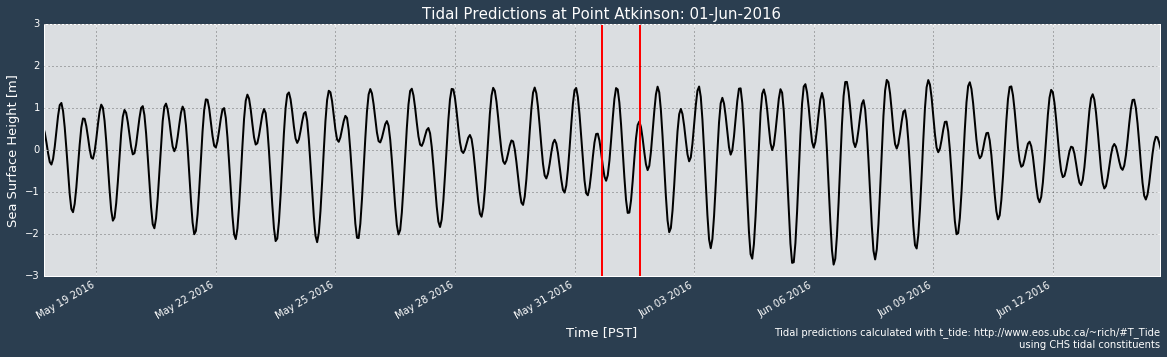

In [6]:
%%timeit -n1 -r1

# Reference rendering of figure

fig = figures.PA_tidal_predictions(grid_T_hr, tidal_predictions)

3.27 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


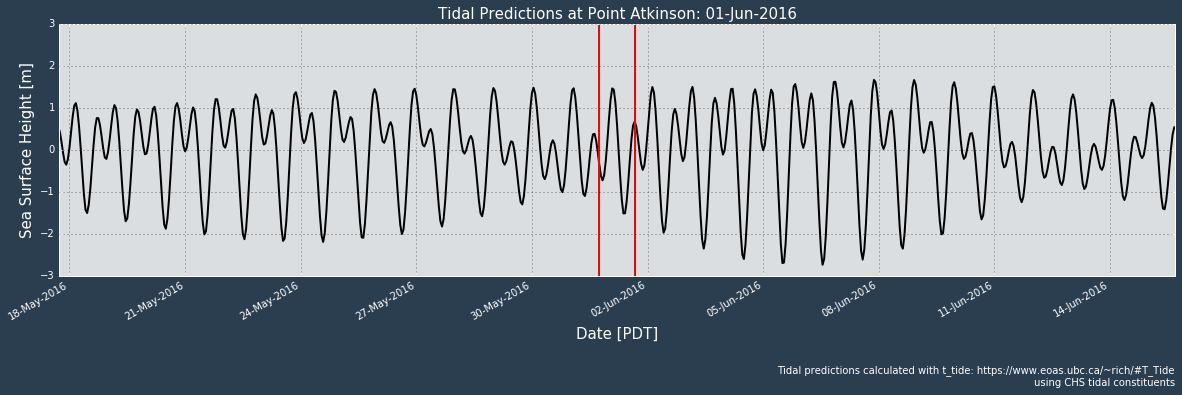

In [6]:
%%timeit -n1 -r1

# Refactored rendering of figure

from importlib import reload
from nowcast.figures import website_theme
reload(pt_atkinson_tide)
reload(website_theme)

fig = pt_atkinson_tide.make_figure(
    grid_T_hr, tidal_predictions, config['timezone'], theme=website_theme)